# Loan Prediction Using Machine Learning

## In this project we will predict whether a customer will get the loan from bank or not base on the Following factors are:
### 1.Gender 
### 2.Education
### 3.Marrital status
### 4.Load Amount
### 5.Credit History
### 6.Account Balance
### 7.Property Area
### 8.Credit History 
### 9.Dependants
### 10.Self Employment Status

### There are more factors also that are not listed here, its going to be observed in the notebook after reading the table into the environment 


In [1]:
import pandas as pd
import numpy as np
from random import randint
import os

In [2]:
train = pd.read_csv("/content/drive/MyDrive/Loan_Data/train.csv")
train["Loan_Staus"] = train.Loan_Status.map({"Y":1, "N":0}) 

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Staus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [5]:
train.drop("Loan_Status", axis=1, inplace=True)

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Staus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Staus
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Staus            0
dtype: int64

#Preprocessing on the data

In [9]:
Loan_status = train["Loan_Staus"]
train.drop(["Loan_Staus"], axis=1, inplace=True)
test = pd.read_csv("/content/drive/MyDrive/Loan_Data/test.csv")
Loan_ID = test.Loan_ID
data = train.append(test)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [10]:
data.shape

(981, 12)

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [13]:
data["Dependents"].dtypes

dtype('O')

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


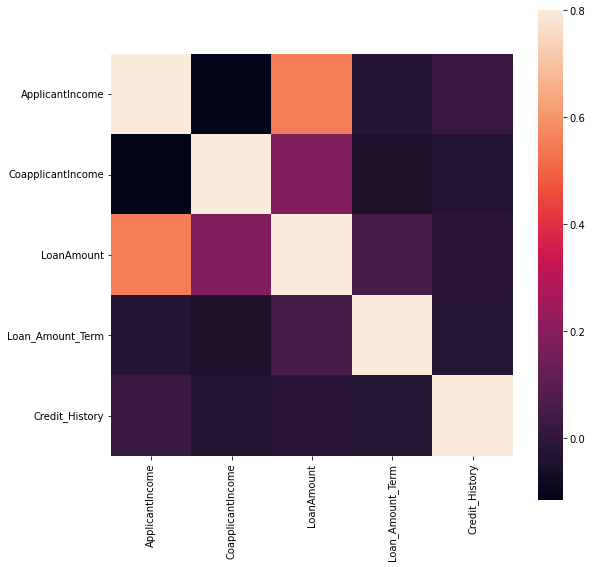

In [15]:
#data correlation of Gender
%matplotlib inline
corrmat = data.corr()
f, ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat, vmax=.8, square=True)

#Label Encode

In [17]:
## label encoder for gender
data["Gender"] = data["Gender"].map({"Male":1, "Female": 0})
data["Gender"].value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

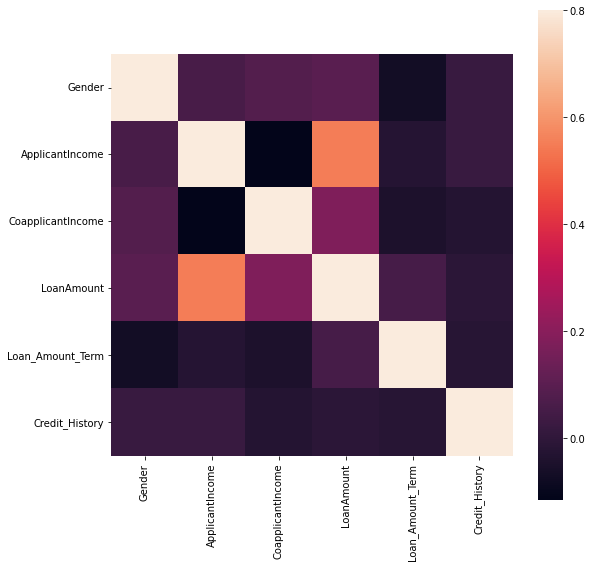

In [18]:
# correlation of the data
corrmat = data.corr()
f, ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [19]:
## Labelling 0 and 1 for Marital status
data["Married"] = data["Married"].map({"Yes":1, "No":0})

In [20]:
data["Married"].value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [21]:
## Labelling 0 and 1 for Dependents
data["Dependents"] = data["Dependents"].map({"0":0, "1":1, "2":2, "3+":3})

In [22]:
data["Dependents"].value_counts()

0.0    545
2.0    160
1.0    160
3.0     91
Name: Dependents, dtype: int64

In [23]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,1.0,1.0,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,1.0,1.0,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,1.0,1.0,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,1.0,0.0,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [24]:
## Labelling 0 and 1 for Education status
data["Education"] = data["Education"].map({"Graduate":1, "Not Graduate":0})

In [25]:
data["Education"].value_counts()

1    763
0    218
Name: Education, dtype: int64

In [26]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,1.0,1.0,1.0,1,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,1.0,1.0,0.0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,1.0,1.0,0.0,0,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,1.0,0.0,0.0,1,No,6000,0.0,141.0,360.0,1.0,Urban


In [27]:
## Labelling 0 and 1 for Employment status
data["Self_Employed"] = data["Self_Employed"].map({"Yes":1, "No":0})

In [28]:
data["Self_Employed"].value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

In [29]:
## Labelling 0 and 1 for Property Area status
data["Property_Area"] = data["Property_Area"].map({"Urban":1, "Rural":0, "Semiurban":2})

data["Property_Area"].value_counts()


2    349
1    342
0    290
Name: Property_Area, dtype: int64

In [30]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1


In [31]:
data["Credit_History"].size

981

## Filling missing value

In [32]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [35]:
data["Credit_History"].fillna(np.random.randint(0,2), inplace=True)

In [36]:
data["Married"].fillna(np.random.randint(0,2), inplace=True)

In [37]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [38]:
##filling missing value with median
data["LoanAmount"].fillna(data["LoanAmount"].median(), inplace=True)

In [39]:
##filling missing value with median
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].median(), inplace=True)

In [40]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [42]:
##filling missing value in Gender with random number
data["Gender"].fillna(np.random.randint(0,2), inplace=True)

In [44]:
##fiiling the missing value i  Dependent with median
data["Dependents"].fillna(data["Dependents"].median(), inplace=True)

In [45]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [46]:
##filling missing value in self_Employed random value
data["Self_Employed"].fillna(np.random.randint(0,2), inplace=True)

In [47]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

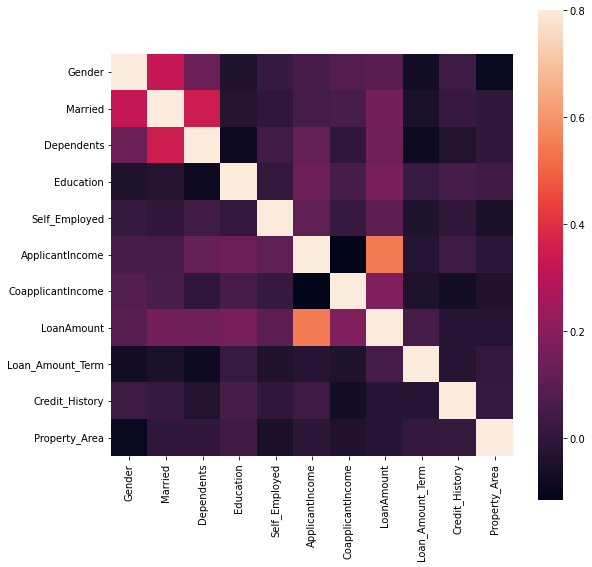

In [48]:
#data correlation for the data
%matplotlib inline
corrmat = data.corr()
f, ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [49]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1


In [50]:
## Dropping loan ID from data, it's not useful 
data.drop("Loan_ID", inplace=True, axis=1)

In [51]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1


# Split the data into X and Y

In [52]:
train_X=data.iloc[:614,] ## all the data in X (Train set)
train_Y=Loan_status ## Loan status will be our Y

In [53]:
from sklearn.model_selection import train_test_split 

train_X, test_X, train_Y, test_Y = train_test_split(train_X,train_Y, random_state=0)


In [54]:
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1.0,1.0,1.0,1,0.0,5649,0.0,44.0,360.0,1.0,1
272,1.0,0.0,0.0,1,0.0,2833,1857.0,126.0,360.0,1.0,0
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162.0,360.0,1.0,0
382,0.0,0.0,0.0,1,0.0,6000,0.0,156.0,360.0,1.0,1
283,0.0,0.0,0.0,1,0.0,1811,1666.0,54.0,360.0,1.0,1


In [55]:
train_Y.head()

46     1
272    1
474    1
382    1
283    1
Name: Loan_Staus, dtype: int64

# using different machine learning algorithm to build the model

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Fit the all Machine Learning Models

In [57]:
models = []
models.append(("Logistic Regression: ",LogisticRegression()))
models.append(("Decision Tree: ",DecisionTreeClassifier()))
models.append(("Linear Descriminant Analysis: ",LinearDiscriminantAnalysis()))
models.append(("Random Forest: ",RandomForestClassifier()))
models.append(("Support Vector Classifier: ",SVC()))
models.append(("K Neirest Neighbor : ",KNeighborsClassifier()))
models.append(("Naive Bayes: ",GaussianNB()))

In [58]:
scoring="accuracy"

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
result = []
names = []

In [63]:
for name, model in models:
  kf = KFold(n_splits=10,shuffle=True, random_state=0)
  cv_result=cross_val_score(model, train_X,train_Y, cv=kf, scoring=scoring)
  result.append(cv_result)
  names.append(name)
  print(model)
  print("%s %f" % (name, cv_result.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()
Logistic Regression:  0.741304
DecisionTreeClassifier()
Decision Tree:  0.647826
LinearDiscriminantAnalysis()
Linear Descriminant Analysis:  0.763043
RandomForestClassifier()
Random Forest:  0.717391
SVC()
Support Vector Classifier:  0.671739
KNeighborsClassifier()
K Neirest Neighbor :  0.643478
GaussianNB()
Naive Bayes:  0.732609


In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

LinR = LogisticRegression()
LinR.fit(train_X, train_Y)
pred = LinR.predict(test_X)
print("Model Accuracy: ", accuracy_score(test_Y, pred))
print(confusion_matrix(test_Y, pred))
print(classification_report(test_Y, pred))



Model Accuracy:  0.7987012987012987
[[ 22  21]
 [ 10 101]]
              precision    recall  f1-score   support

           0       0.69      0.51      0.59        43
           1       0.83      0.91      0.87       111

    accuracy                           0.80       154
   macro avg       0.76      0.71      0.73       154
weighted avg       0.79      0.80      0.79       154



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [72]:
LinD = LinearDiscriminantAnalysis()
LinD.fit(train_X, train_Y)
pred = LinD.predict(test_X)
print("Model Accuracy: ", accuracy_score(test_Y, pred))
print(confusion_matrix(test_Y, pred))
print(classification_report(test_Y, pred))

Model Accuracy:  0.7987012987012987
[[ 23  20]
 [ 11 100]]
              precision    recall  f1-score   support

           0       0.68      0.53      0.60        43
           1       0.83      0.90      0.87       111

    accuracy                           0.80       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.79      0.80      0.79       154



In [73]:
G = GaussianNB()
G.fit(train_X, train_Y)
pred = G.predict(test_X)
print("Model Accuracy: ", accuracy_score(test_Y, pred))
print(confusion_matrix(test_Y, pred))
print(classification_report(test_Y, pred))


Model Accuracy:  0.7727272727272727
[[21 22]
 [13 98]]
              precision    recall  f1-score   support

           0       0.62      0.49      0.55        43
           1       0.82      0.88      0.85       111

    accuracy                           0.77       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.76      0.77      0.76       154



In [74]:
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
 0 0 1 1 1 1]


In [76]:
import pickle
# now you can save it to a file 
with open("model_pickle", "wb") as f:
  pickle.dump(LinR, f)

In [78]:
with open("model_pickle", "rb") as f:
  mp = pickle.load(f)

In [80]:
mp.predict([[0.0, 0.0, 0.0, 1, 0.0, 1811, 1666.0, 54.0, 360.0, 1,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [81]:
import pickle
# now you can save it to a file 
with open("model_pickle", "wb") as f:
  pickle.dump(LinD, f)

In [82]:
with open("model_pickle", "rb") as f:
  LD = pickle.load(f)

In [83]:
LD.predict([[0.0, 0.0, 0.0, 1, 0.0, 1811, 1666.0, 54.0, 360.0, 1,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [86]:
s = SVC()
s.fit(train_X, train_Y)
pred = s.predict(test_X)
print("Model Accuracy: ", accuracy_score(test_Y, pred))
print(confusion_matrix(test_Y, pred))
print(classification_report(test_Y, pred))


Model Accuracy:  0.7207792207792207
[[  0  43]
 [  0 111]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.72      1.00      0.84       111

    accuracy                           0.72       154
   macro avg       0.36      0.50      0.42       154
weighted avg       0.52      0.72      0.60       154



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
import pickle
# now you can save it to a file 
with open("model_pickle", "wb") as f:
  pickle.dump(s, f)

In [88]:
with open("model_pickle", "rb") as f:
  sc = pickle.load(f)

In [89]:
sc.predict([[0.0, 0.0, 0.0, 1, 0.0, 1811, 1666.0, 54.0, 360.0, 1,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([1])